In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# Statistical analysis
from scipy import stats
from scipy import mean

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, distinct
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy.ext.automap import automap_base

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
session = Session(bind=engine)

In [7]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [8]:
# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [9]:
# Using the inspector to print the column names within the 'measurement' table and its types
measurements = inspector.get_columns('measurement')
for measurement in measurements:
    print(measurement["name"], measurement["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Using the inspector to print the column names within the 'station' table and its types
stations = inspector.get_columns('station')
for station in stations:
    print(station["name"], station["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# automap base
Base = automap_base()

# reflect an existing database into a new model
Base.metadata.create_all(engine)

Base.prepare(engine, reflect= True)

In [12]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [13]:
# Reflect and save reference to the measurement table
Measurement = Base.classes.measurement

In [14]:
# Reflect and save reference to the station table
Station = Base.classes.station

In [15]:
# Query the Measurement Table
# ----------------------------------
measurements = session.query(Measurement)

for m in measurements:
    print(m.station, m.date, m.prcp, m.tobs)

USC00519397 2010-01-01 0.08 65.0
USC00519397 2010-01-02 0.0 63.0
USC00519397 2010-01-03 0.0 74.0
USC00519397 2010-01-04 0.0 76.0
USC00519397 2010-01-06 None 73.0
USC00519397 2010-01-07 0.06 70.0
USC00519397 2010-01-08 0.0 64.0
USC00519397 2010-01-09 0.0 68.0
USC00519397 2010-01-10 0.0 73.0
USC00519397 2010-01-11 0.01 64.0
USC00519397 2010-01-12 0.0 61.0
USC00519397 2010-01-14 0.0 66.0
USC00519397 2010-01-15 0.0 65.0
USC00519397 2010-01-16 0.0 68.0
USC00519397 2010-01-17 0.0 64.0
USC00519397 2010-01-18 0.0 72.0
USC00519397 2010-01-19 0.0 66.0
USC00519397 2010-01-20 0.0 66.0
USC00519397 2010-01-21 0.0 69.0
USC00519397 2010-01-22 0.0 67.0
USC00519397 2010-01-23 0.0 67.0
USC00519397 2010-01-24 0.01 71.0
USC00519397 2010-01-25 0.0 67.0
USC00519397 2010-01-26 0.04 76.0
USC00519397 2010-01-27 0.12 68.0
USC00519397 2010-01-28 0.0 72.0
USC00519397 2010-01-30 None 70.0
USC00519397 2010-01-31 0.03 67.0
USC00519397 2010-02-01 0.01 66.0
USC00519397 2010-02-03 None 67.0
USC00519397 2010-02-04 0.01 6

USC00519397 2012-10-26 0.0 76.0
USC00519397 2012-10-27 0.0 74.0
USC00519397 2012-10-28 0.02 77.0
USC00519397 2012-10-29 0.04 77.0
USC00519397 2012-10-30 0.0 76.0
USC00519397 2012-10-31 0.02 78.0
USC00519397 2012-11-01 0.0 71.0
USC00519397 2012-11-02 0.0 70.0
USC00519397 2012-11-03 0.0 74.0
USC00519397 2012-11-04 0.0 71.0
USC00519397 2012-11-05 0.0 69.0
USC00519397 2012-11-06 0.0 76.0
USC00519397 2012-11-07 0.0 77.0
USC00519397 2012-11-08 0.0 77.0
USC00519397 2012-11-09 0.03 76.0
USC00519397 2012-11-10 0.0 75.0
USC00519397 2012-11-11 0.0 76.0
USC00519397 2012-11-12 0.0 77.0
USC00519397 2012-11-13 0.06 77.0
USC00519397 2012-11-14 0.0 77.0
USC00519397 2012-11-15 0.08 75.0
USC00519397 2012-11-16 0.03 73.0
USC00519397 2012-11-17 0.01 74.0
USC00519397 2012-11-18 0.03 76.0
USC00519397 2012-11-19 0.0 75.0
USC00519397 2012-11-20 0.0 75.0
USC00519397 2012-11-21 0.0 71.0
USC00519397 2012-11-22 0.0 69.0
USC00519397 2012-11-23 0.0 71.0
USC00519397 2012-11-24 0.02 69.0
USC00519397 2012-11-25 0.0 74.

USC00519397 2015-11-29 0.03 76.0
USC00519397 2015-11-30 0.01 77.0
USC00519397 2015-12-01 0.0 75.0
USC00519397 2015-12-02 0.0 77.0
USC00519397 2015-12-03 0.06 75.0
USC00519397 2015-12-04 0.02 75.0
USC00519397 2015-12-05 0.0 75.0
USC00519397 2015-12-06 0.0 75.0
USC00519397 2015-12-07 0.0 71.0
USC00519397 2015-12-08 0.0 70.0
USC00519397 2015-12-09 0.0 74.0
USC00519397 2015-12-10 0.06 74.0
USC00519397 2015-12-11 0.0 75.0
USC00519397 2015-12-12 0.39 72.0
USC00519397 2015-12-13 0.0 70.0
USC00519397 2015-12-14 0.0 66.0
USC00519397 2015-12-15 0.08 74.0
USC00519397 2015-12-16 0.0 75.0
USC00519397 2015-12-17 0.02 74.0
USC00519397 2015-12-18 0.08 75.0
USC00519397 2015-12-19 0.13 76.0
USC00519397 2015-12-20 0.03 74.0
USC00519397 2015-12-21 0.01 75.0
USC00519397 2015-12-22 0.0 74.0
USC00519397 2015-12-23 0.0 73.0
USC00519397 2015-12-24 0.0 68.0
USC00519397 2015-12-25 0.0 73.0
USC00519397 2015-12-26 0.02 74.0
USC00519397 2015-12-27 0.43 74.0
USC00519397 2015-12-28 0.01 77.0
USC00519397 2015-12-29 0.

USC00513117 2011-05-15 0.0 73.0
USC00513117 2011-05-16 0.01 74.0
USC00513117 2011-05-17 0.0 73.0
USC00513117 2011-05-18 0.3 70.0
USC00513117 2011-05-19 0.01 71.0
USC00513117 2011-05-20 0.03 74.0
USC00513117 2011-05-21 0.0 75.0
USC00513117 2011-05-22 0.08 74.0
USC00513117 2011-05-23 0.06 74.0
USC00513117 2011-05-24 0.0 74.0
USC00513117 2011-05-25 0.02 74.0
USC00513117 2011-05-26 0.0 74.0
USC00513117 2011-05-27 0.03 74.0
USC00513117 2011-05-28 0.02 76.0
USC00513117 2011-05-29 0.1 76.0
USC00513117 2011-05-30 0.0 75.0
USC00513117 2011-05-31 0.0 74.0
USC00513117 2011-06-01 0.03 74.0
USC00513117 2011-06-02 0.08 75.0
USC00513117 2011-06-03 0.63 71.0
USC00513117 2011-06-04 4.43 69.0
USC00513117 2011-06-05 4.02 69.0
USC00513117 2011-06-06 0.02 74.0
USC00513117 2011-06-07 0.06 71.0
USC00513117 2011-06-08 0.04 74.0
USC00513117 2011-06-09 0.01 74.0
USC00513117 2011-06-10 0.02 75.0
USC00513117 2011-06-11 0.01 73.0
USC00513117 2011-06-12 0.12 73.0
USC00513117 2011-06-13 0.16 73.0
USC00513117 2011-06

USC00513117 2014-11-13 0.0 71.0
USC00513117 2014-11-14 0.09 75.0
USC00513117 2014-11-15 1.03 71.0
USC00513117 2014-11-16 0.09 72.0
USC00513117 2014-11-17 0.0 75.0
USC00513117 2014-11-18 0.0 76.0
USC00513117 2014-11-19 0.01 75.0
USC00513117 2014-11-20 0.01 76.0
USC00513117 2014-11-21 0.01 81.0
USC00513117 2014-11-22 0.0 76.0
USC00513117 2014-11-23 0.0 72.0
USC00513117 2014-11-24 0.13 71.0
USC00513117 2014-11-25 0.05 70.0
USC00513117 2014-11-26 0.01 73.0
USC00513117 2014-11-27 0.0 74.0
USC00513117 2014-11-28 0.01 73.0
USC00513117 2014-11-29 0.02 74.0
USC00513117 2014-11-30 0.15 73.0
USC00513117 2014-12-01 0.0 72.0
USC00513117 2014-12-02 0.0 71.0
USC00513117 2014-12-03 0.05 69.0
USC00513117 2014-12-04 1.35 67.0
USC00513117 2014-12-05 0.01 70.0
USC00513117 2014-12-06 0.0 72.0
USC00513117 2014-12-07 0.0 67.0
USC00513117 2014-12-08 0.0 67.0
USC00513117 2014-12-09 0.0 69.0
USC00513117 2014-12-10 0.0 67.0
USC00513117 2014-12-11 0.05 74.0
USC00513117 2014-12-12 0.12 70.0
USC00513117 2014-12-13 

USC00514830 2010-09-17 0.03 75.0
USC00514830 2010-09-18 0.0 75.0
USC00514830 2010-09-19 0.06 74.0
USC00514830 2010-09-20 0.03 74.0
USC00514830 2010-09-21 0.01 74.0
USC00514830 2010-09-22 0.41 71.0
USC00514830 2010-09-23 0.57 75.0
USC00514830 2010-09-24 0.0 76.0
USC00514830 2010-09-25 0.0 75.0
USC00514830 2010-09-26 0.0 75.0
USC00514830 2010-09-27 0.0 73.0
USC00514830 2010-09-28 0.01 76.0
USC00514830 2010-09-29 0.0 73.0
USC00514830 2010-09-30 0.03 73.0
USC00514830 2010-10-01 0.3 71.0
USC00514830 2010-10-02 0.09 75.0
USC00514830 2010-10-03 0.01 76.0
USC00514830 2010-10-04 0.11 74.0
USC00514830 2010-10-05 0.02 76.0
USC00514830 2010-10-06 0.0 75.0
USC00514830 2010-10-07 0.0 75.0
USC00514830 2010-10-08 0.0 75.0
USC00514830 2010-10-09 0.0 75.0
USC00514830 2010-10-10 0.03 74.0
USC00514830 2010-10-11 0.04 74.0
USC00514830 2010-10-12 0.03 74.0
USC00514830 2010-10-13 0.01 75.0
USC00514830 2010-10-14 0.0 75.0
USC00514830 2010-10-15 0.0 75.0
USC00514830 2010-10-17 None 74.0
USC00514830 2010-10-18 

USC00514830 2014-08-12 0.01 79.0
USC00514830 2014-08-13 0.1 79.0
USC00514830 2014-08-14 0.0 78.0
USC00514830 2014-08-15 0.0 78.0
USC00514830 2014-08-17 None 79.0
USC00514830 2014-08-18 0.0 79.0
USC00514830 2014-08-19 0.0 78.0
USC00514830 2014-08-20 0.14 78.0
USC00514830 2014-08-21 0.0 77.0
USC00514830 2014-08-22 0.08 76.0
USC00514830 2014-08-24 None 80.0
USC00514830 2014-08-25 0.0 80.0
USC00514830 2014-08-26 0.19 80.0
USC00514830 2014-08-27 0.05 80.0
USC00514830 2014-08-28 0.09 80.0
USC00514830 2014-08-29 0.04 80.0
USC00514830 2014-08-30 0.05 80.0
USC00514830 2014-09-01 None 80.0
USC00514830 2014-09-02 0.47 80.0
USC00514830 2014-09-03 0.0 79.0
USC00514830 2014-09-04 0.01 82.0
USC00514830 2014-09-05 0.09 79.0
USC00514830 2014-09-07 None 81.0
USC00514830 2014-09-08 0.0 79.0
USC00514830 2014-09-09 0.0 80.0
USC00514830 2014-09-10 0.01 81.0
USC00514830 2014-09-11 0.0 80.0
USC00514830 2014-09-12 0.3 80.0
USC00514830 2014-09-15 None 77.0
USC00514830 2014-09-16 0.0 81.0
USC00514830 2014-09-17 

USC00517948 2011-11-30 0.12 72.0
USC00517948 2011-12-01 0.0 69.0
USC00517948 2011-12-02 0.0 69.0
USC00517948 2011-12-05 0.0 71.0
USC00517948 2011-12-06 0.0 72.0
USC00517948 2011-12-07 0.07 69.0
USC00517948 2011-12-08 0.05 72.0
USC00517948 2011-12-09 0.16 70.0
USC00517948 2011-12-12 None 76.0
USC00517948 2011-12-13 2.8 69.0
USC00517948 2011-12-14 0.86 71.0
USC00517948 2011-12-15 0.02 72.0
USC00517948 2011-12-16 None 71.0
USC00517948 2012-01-04 0.0 76.0
USC00517948 2012-01-05 0.0 74.0
USC00517948 2012-01-06 0.0 65.0
USC00517948 2012-01-09 0.0 64.0
USC00517948 2012-01-10 0.0 66.0
USC00517948 2012-01-11 None 67.0
USC00517948 2012-01-12 None 66.0
USC00517948 2012-01-13 None 62.0
USC00517948 2012-01-17 0.0 69.0
USC00517948 2012-01-18 0.0 73.0
USC00517948 2012-01-19 0.0 73.0
USC00517948 2012-01-20 0.0 73.0
USC00517948 2012-01-23 0.0 69.0
USC00517948 2012-01-24 0.0 72.0
USC00517948 2012-01-25 0.0 68.0
USC00517948 2012-01-26 0.0 74.0
USC00517948 2012-01-27 0.33 66.0
USC00517948 2012-01-31 0.0 7

USC00518838 2010-11-16 0.08 76.0
USC00518838 2010-11-18 0.0 75.0
USC00518838 2010-11-19 0.35 72.0
USC00518838 2010-11-22 None 78.0
USC00518838 2010-11-23 0.07 77.0
USC00518838 2010-11-24 0.16 76.0
USC00518838 2010-11-29 None 75.0
USC00518838 2010-12-02 None 71.0
USC00518838 2010-12-03 0.78 70.0
USC00518838 2010-12-05 None 73.0
USC00518838 2010-12-06 0.02 78.0
USC00518838 2010-12-07 0.02 76.0
USC00518838 2010-12-08 0.33 73.0
USC00518838 2010-12-09 1.43 74.0
USC00518838 2010-12-10 2.5 63.0
USC00518838 2010-12-11 1.5 72.0
USC00518838 2010-12-13 None 75.0
USC00518838 2010-12-14 0.13 74.0
USC00518838 2010-12-15 0.1 72.0
USC00518838 2010-12-16 0.05 68.0
USC00518838 2011-01-04 None 73.0
USC00518838 2011-01-05 0.15 71.0
USC00518838 2011-01-06 0.14 65.0
USC00518838 2011-01-07 0.0 64.0
USC00518838 2011-01-10 None 69.0
USC00518838 2011-01-11 0.73 74.0
USC00518838 2011-01-12 1.15 66.0
USC00518838 2011-01-13 6.3 66.0
USC00518838 2011-01-14 0.7 71.0
USC00518838 2011-01-18 None 67.0
USC00518838 2011-

USC00519523 2012-08-15 0.0 77.0
USC00519523 2012-08-16 0.0 76.0
USC00519523 2012-08-17 0.0 81.0
USC00519523 2012-08-18 0.03 75.0
USC00519523 2012-08-19 0.05 73.0
USC00519523 2012-08-20 0.0 76.0
USC00519523 2012-08-21 0.02 76.0
USC00519523 2012-08-22 0.01 75.0
USC00519523 2012-08-23 0.0 78.0
USC00519523 2012-08-24 0.0 76.0
USC00519523 2012-08-25 0.0 79.0
USC00519523 2012-08-26 0.01 78.0
USC00519523 2012-08-27 0.04 77.0
USC00519523 2012-08-28 0.03 75.0
USC00519523 2012-08-29 0.05 75.0
USC00519523 2012-08-30 0.04 76.0
USC00519523 2012-08-31 0.0 77.0
USC00519523 2012-09-01 0.0 80.0
USC00519523 2012-09-02 0.0 80.0
USC00519523 2012-09-03 0.0 82.0
USC00519523 2012-09-04 0.0 74.0
USC00519523 2012-09-05 0.0 75.0
USC00519523 2012-09-06 0.07 76.0
USC00519523 2012-09-07 0.02 82.0
USC00519523 2012-09-08 0.14 79.0
USC00519523 2012-09-09 0.02 76.0
USC00519523 2012-09-10 0.0 76.0
USC00519523 2012-09-11 0.0 76.0
USC00519523 2012-09-12 0.05 76.0
USC00519523 2012-09-13 0.0 77.0
USC00519523 2012-09-14 0.1

USC00519523 2016-04-09 0.0 76.0
USC00519523 2016-04-10 0.0 76.0
USC00519523 2016-04-11 0.0 75.0
USC00519523 2016-04-12 0.0 77.0
USC00519523 2016-04-13 0.18 77.0
USC00519523 2016-04-14 0.08 77.0
USC00519523 2016-04-15 0.04 79.0
USC00519523 2016-04-16 0.0 76.0
USC00519523 2016-04-17 0.09 72.0
USC00519523 2016-04-18 0.46 73.0
USC00519523 2016-04-20 None 74.0
USC00519523 2016-04-21 0.0 75.0
USC00519523 2016-04-22 0.0 77.0
USC00519523 2016-04-23 0.04 77.0
USC00519523 2016-04-24 0.29 75.0
USC00519523 2016-04-25 0.0 79.0
USC00519523 2016-04-26 0.0 76.0
USC00519523 2016-04-27 0.0 79.0
USC00519523 2016-04-28 0.0 79.0
USC00519523 2016-04-29 0.0 77.0
USC00519523 2016-04-30 0.0 77.0
USC00519523 2016-05-01 0.09 78.0
USC00519523 2016-05-02 0.07 75.0
USC00519523 2016-05-03 0.0 78.0
USC00519523 2016-05-04 0.0 75.0
USC00519523 2016-05-05 0.27 77.0
USC00519523 2016-05-06 0.0 73.0
USC00519523 2016-05-07 1.8 71.0
USC00519523 2016-05-08 0.75 71.0
USC00519523 2016-05-09 0.02 73.0
USC00519523 2016-05-10 0.0 

USC00519281 2012-02-27 0.02 69.0
USC00519281 2012-02-28 0.05 70.0
USC00519281 2012-02-29 0.04 70.0
USC00519281 2012-03-01 0.0 71.0
USC00519281 2012-03-02 0.0 68.0
USC00519281 2012-03-03 4.68 71.0
USC00519281 2012-03-04 0.07 69.0
USC00519281 2012-03-05 6.24 65.0
USC00519281 2012-03-06 2.59 66.0
USC00519281 2012-03-07 1.68 66.0
USC00519281 2012-03-08 0.53 68.0
USC00519281 2012-03-09 1.44 68.0
USC00519281 2012-03-10 3.47 73.0
USC00519281 2012-03-11 0.14 72.0
USC00519281 2012-03-12 0.23 70.0
USC00519281 2012-03-13 0.0 69.0
USC00519281 2012-03-14 0.02 69.0
USC00519281 2012-03-15 0.0 68.0
USC00519281 2012-03-16 0.04 70.0
USC00519281 2012-03-17 0.02 75.0
USC00519281 2012-03-18 0.1 69.0
USC00519281 2012-03-19 0.29 69.0
USC00519281 2012-03-20 0.12 64.0
USC00519281 2012-03-21 0.0 68.0
USC00519281 2012-03-22 0.2 68.0
USC00519281 2012-03-23 0.01 69.0
USC00519281 2012-03-24 0.12 72.0
USC00519281 2012-03-25 0.32 70.0
USC00519281 2012-03-26 0.1 70.0
USC00519281 2012-03-27 0.06 66.0
USC00519281 2012-0

USC00519281 2015-07-31 0.01 77.0
USC00519281 2015-08-01 0.0 78.0
USC00519281 2015-08-02 0.01 79.0
USC00519281 2015-08-03 0.0 75.0
USC00519281 2015-08-04 0.01 69.0
USC00519281 2015-08-05 0.02 76.0
USC00519281 2015-08-06 0.47 74.0
USC00519281 2015-08-07 0.02 73.0
USC00519281 2015-08-08 0.16 80.0
USC00519281 2015-08-09 0.06 74.0
USC00519281 2015-08-10 0.04 75.0
USC00519281 2015-08-11 0.04 75.0
USC00519281 2015-08-12 0.01 76.0
USC00519281 2015-08-13 0.07 76.0
USC00519281 2015-08-14 0.43 75.0
USC00519281 2015-08-15 0.18 76.0
USC00519281 2015-08-16 0.04 74.0
USC00519281 2015-08-17 0.24 78.0
USC00519281 2015-08-18 0.89 76.0
USC00519281 2015-08-19 0.03 74.0
USC00519281 2015-08-20 0.0 72.0
USC00519281 2015-08-21 1.62 77.0
USC00519281 2015-08-22 0.03 80.0
USC00519281 2015-08-23 2.86 80.0
USC00519281 2015-08-24 3.62 72.0
USC00519281 2015-08-25 0.31 79.0
USC00519281 2015-08-26 0.6 72.0
USC00519281 2015-08-27 2.96 75.0
USC00519281 2015-08-28 0.05 77.0
USC00519281 2015-08-29 0.01 82.0
USC00519281 20

USC00511918 2011-06-11 0.0 78.0
USC00511918 2011-06-12 0.02 76.0
USC00511918 2011-06-13 0.0 69.0
USC00511918 2011-06-14 0.0 73.0
USC00511918 2011-06-15 0.0 76.0
USC00511918 2011-06-16 0.01 72.0
USC00511918 2011-06-17 0.0 72.0
USC00511918 2011-06-18 0.0 80.0
USC00511918 2011-06-19 0.0 76.0
USC00511918 2011-06-20 0.01 71.0
USC00511918 2011-06-21 0.03 68.0
USC00511918 2011-06-22 0.1 71.0
USC00511918 2011-06-23 0.01 72.0
USC00511918 2011-06-24 0.0 75.0
USC00511918 2011-06-25 0.0 80.0
USC00511918 2011-06-26 0.0 75.0
USC00511918 2011-06-27 0.0 74.0
USC00511918 2011-06-28 0.0 74.0
USC00511918 2011-06-29 0.0 69.0
USC00511918 2011-06-30 0.0 70.0
USC00511918 2011-07-01 0.0 68.0
USC00511918 2011-07-02 0.02 79.0
USC00511918 2011-07-03 0.0 77.0
USC00511918 2011-07-04 0.0 77.0
USC00511918 2011-07-05 0.0 70.0
USC00511918 2011-07-06 0.0 74.0
USC00511918 2011-07-07 0.03 71.0
USC00511918 2011-07-08 0.0 75.0
USC00511918 2011-07-09 0.0 76.0
USC00511918 2011-07-10 0.02 79.0
USC00511918 2011-07-11 0.0 71.0


USC00511918 2014-12-02 0.0 62.0
USC00511918 2014-12-03 0.17 68.0
USC00511918 2014-12-04 0.09 67.0
USC00511918 2014-12-05 0.0 70.0
USC00511918 2014-12-06 0.0 66.0
USC00511918 2014-12-07 0.0 64.0
USC00511918 2014-12-08 0.01 62.0
USC00511918 2014-12-09 0.0 64.0
USC00511918 2014-12-10 0.0 63.0
USC00511918 2014-12-11 0.01 69.0
USC00511918 2014-12-12 0.0 64.0
USC00511918 2014-12-14 None 70.0
USC00511918 2014-12-15 0.0 72.0
USC00511918 2014-12-16 0.0 72.0
USC00511918 2014-12-17 0.03 64.0
USC00511918 2014-12-18 0.0 71.0
USC00511918 2014-12-19 0.0 68.0
USC00511918 2014-12-20 0.0 81.0
USC00511918 2014-12-21 0.0 78.0
USC00511918 2014-12-22 0.01 69.0
USC00511918 2014-12-23 0.1 72.0
USC00511918 2014-12-24 0.0 70.0
USC00511918 2014-12-25 0.0 62.0
USC00511918 2014-12-26 0.0 76.0
USC00511918 2014-12-27 0.0 72.0
USC00511918 2014-12-28 0.0 76.0
USC00511918 2014-12-29 0.0 57.0
USC00511918 2014-12-30 0.0 64.0
USC00511918 2014-12-31 0.7 57.0
USC00511918 2015-01-01 0.0 66.0
USC00511918 2015-01-02 0.0 65.0
U

USC00516128 2012-12-25 0.0 71.0
USC00516128 2012-12-26 0.21 69.0
USC00516128 2012-12-27 0.02 69.0
USC00516128 2012-12-28 0.0 62.0
USC00516128 2012-12-29 0.0 62.0
USC00516128 2012-12-30 0.1 67.0
USC00516128 2012-12-31 0.04 65.0
USC00516128 2013-01-01 0.24 70.0
USC00516128 2013-01-02 2.13 67.0
USC00516128 2013-01-03 5.96 66.0
USC00516128 2013-01-04 2.92 67.0
USC00516128 2013-01-05 1.34 67.0
USC00516128 2013-01-06 0.76 67.0
USC00516128 2013-01-07 0.51 67.0
USC00516128 2013-01-08 0.53 68.0
USC00516128 2013-01-09 3.01 67.0
USC00516128 2013-01-10 0.14 69.0
USC00516128 2013-01-11 0.11 68.0
USC00516128 2013-01-12 0.19 67.0
USC00516128 2013-01-13 1.05 68.0
USC00516128 2013-01-14 0.02 70.0
USC00516128 2013-01-15 0.86 69.0
USC00516128 2013-01-16 0.0 64.0
USC00516128 2013-01-17 0.0 64.0
USC00516128 2013-01-18 0.0 65.0
USC00516128 2013-01-19 0.0 70.0
USC00516128 2013-01-20 0.0 67.0
USC00516128 2013-01-21 0.0 69.0
USC00516128 2013-01-22 0.0 68.0
USC00516128 2013-01-23 0.27 65.0
USC00516128 2013-01-2

USC00516128 2016-09-11 0.6 71.0
USC00516128 2016-09-12 1.04 72.0
USC00516128 2016-09-13 1.2 75.0
USC00516128 2016-09-14 6.7 73.0
USC00516128 2016-09-15 3.35 73.0
USC00516128 2016-09-16 0.61 73.0
USC00516128 2016-09-17 0.23 76.0
USC00516128 2016-09-18 0.42 75.0
USC00516128 2016-09-19 0.25 70.0
USC00516128 2016-09-20 0.43 70.0
USC00516128 2016-09-21 1.02 73.0
USC00516128 2016-09-22 0.75 73.0
USC00516128 2016-09-23 0.33 73.0
USC00516128 2016-09-24 0.27 77.0
USC00516128 2016-09-25 0.04 76.0
USC00516128 2016-09-26 1.02 74.0
USC00516128 2016-09-27 1.0 74.0
USC00516128 2016-09-28 0.05 77.0
USC00516128 2016-09-29 1.49 77.0
USC00516128 2016-09-30 0.38 73.0
USC00516128 2016-10-01 1.02 74.0
USC00516128 2016-10-02 0.61 73.0
USC00516128 2016-10-03 0.46 76.0
USC00516128 2016-10-04 3.46 74.0
USC00516128 2016-10-05 0.81 75.0
USC00516128 2016-10-06 0.04 75.0
USC00516128 2016-10-07 0.01 73.0
USC00516128 2016-10-08 0.04 74.0
USC00516128 2016-10-09 0.0 77.0
USC00516128 2016-10-10 0.0 74.0
USC00516128 2016

In [16]:
# Query the Station Table
# ----------------------------------
stations = session.query(Station)

for s in stations:
    print(s.station, s.name, s.latitude, s.longitude, s.elevation)

USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4


# Exploratory Climate Analysis

In [17]:
# Create our session (link) from Python to the DB
conn = engine.connect()

In [18]:
# Perform a simple query of the database to retrieve only date and precipitation

measurement_df = pd.read_sql("select date, prcp from measurement", conn)
measurement_df.style.hide_index()

In [19]:
# Sort dataframe in descending order to find latest date and display it

measurement_df.sort_values(by=['date'], ascending = False, inplace=True)
measurement_df.head(1)

date  prcp
19549  2017-08-23  0.45

In [20]:
# Filter the data to only the last year of data

measurement_df = measurement_df.loc[measurement_df['date'] >= "2016-08-23"]

measurement_df.style.hide_index()

In [21]:
# Summarize the data by date

summary_precipitation = measurement_df.groupby("date")["prcp"].max()

summary_precipitation

date
2016-08-23    1.79
2016-08-24    2.28
2016-08-25    0.21
2016-08-26    0.04
2016-08-27    0.18
              ... 
2017-08-19    0.09
2017-08-20    0.01
2017-08-21    0.56
2017-08-22    0.50
2017-08-23    0.45
Name: prcp, Length: 366, dtype: float64

In [22]:
# Use Pandas Plotting with Matplotlib to plot the data

x_axis = np.arange(len(summary_precipitation.index))


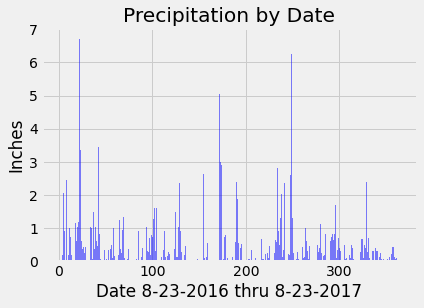

In [31]:

plt.bar(x_axis, summary_precipitation, color='b', alpha=0.5, align="center")

# Prints title and labels
plt.title("Precipitation by Date")
plt.xlabel("Date 8-23-2016 thru 8-23-2017"),
plt.ylabel("Inches")
plt.show()


In [24]:
# Use Pandas to calculate the summary statistics for the precipitation data
perc = [.25,.50,.75]
summary_stats = measurement_df.describe(percentiles = perc, include='float')
summary_stats

prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000

In [25]:
# Design a query to show how many stations are available in this dataset?

station_count = session.query(distinct(Measurement.station)).count()

print(f"There are {station_count} different stations in the measurement table.")

There are 9 different stations in the measurement table.


In [26]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


station_frequencies = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).all()

sorted(station_frequencies)


[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?"USC00519281"

frequent_station = "USC00519281"

sql_expr = """
SELECT station, date, tobs
FROM measurement
WHERE station = 'USC00519281' AND
date >= '2016-08-23'
    
"""

temperatures_df = pd.read_sql(sql_expr,conn)
#temperatures_df = pd.read_sql("select station, date, tobs from measurement where station = 'USC00519281'", conn)

lowest_temp = temperatures_df.tobs.min()
highest_temp = temperatures_df.tobs.max()
avg_temp = temperatures_df.tobs.mean()

print(f"The min temperature reading at {frequent_station} is {lowest_temp}.")
print(f"The max temperature reading at {frequent_station} is {highest_temp}.")
print(f"The avg temperature reading at {frequent_station} is {avg_temp}.")

The min temperature reading at USC00519281 is 59.0.
The max temperature reading at USC00519281 is 83.0.
The avg temperature reading at USC00519281 is 73.10795454545455.


In [28]:

temperatures_df

station        date  tobs
0    USC00519281  2016-08-23  77.0
1    USC00519281  2016-08-24  77.0
2    USC00519281  2016-08-25  80.0
3    USC00519281  2016-08-26  80.0
4    USC00519281  2016-08-27  75.0
..           ...         ...   ...
347  USC00519281  2017-08-14  77.0
348  USC00519281  2017-08-15  77.0
349  USC00519281  2017-08-16  76.0
350  USC00519281  2017-08-17  76.0
351  USC00519281  2017-08-18  79.0

[352 rows x 3 columns]

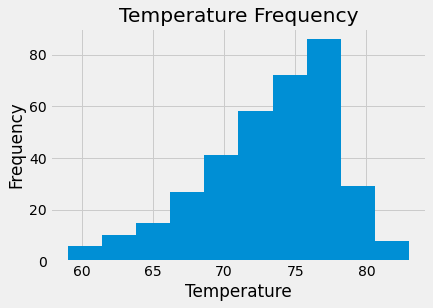

In [29]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

plt.hist(temperatures_df["tobs"], align="mid")

# Prints title and labels
plt.title("Temperature Frequency")
plt.xlabel("Temperature"),
plt.ylabel("Frequency")
plt.show()


In [30]:
# Query the Station Table
# ----------------------------------
# Perform a simple query of the database
station_df = pd.read_sql("select * from station", conn)
station_df.head()

id      station                                    name  latitude  \
0   1  USC00519397                    WAIKIKI 717.2, HI US   21.2716   
1   2  USC00513117                    KANEOHE 838.1, HI US   21.4234   
2   3  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US   21.5213   
3   4  USC00517948                       PEARL CITY, HI US   21.3934   
4   5  USC00518838              UPPER WAHIAWA 874.3, HI US   21.4992   

   longitude  elevation  
0  -157.8168        3.0  
1  -157.8015       14.6  
2  -157.8374        7.0  
3  -157.9751       11.9  
4  -158.0111      306.6